In [1]:
%load_ext autoreload
%autoreload 2
import sys
import torch
from torch import nn
sys.path.append('..')
# sys.path.append('/system/user/beck/pwbeck/projects/regularization/ml_utilities')
from pathlib import Path
from typing import Union
from erank.data import get_metadataset_class
from erank.data.supervised_metadataset_wrapper import SupervisedMetaDatasetWrapper
from omegaconf import OmegaConf
from torch.utils import data
from erank.utils import load_directions_matrix_from_task_sweep
import matplotlib.pyplot as plt
gpu_id = 0

/home/max/anaconda3/envs/erank/lib/python3.8/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
sinus_dataset_class = get_metadataset_class('sinus')
sinus_dataset_class

erank.data.sinusdataset.SinusDataset

In [3]:
sinus_cfg = """
support_size: 10
query_size: 50
# num_tasks: 100 #10000
amplitude_range: [0.1, 5.0]
phase_range: [0, 6.283185307]
x_range: [-5, 5]
regenerate_task_support_set: False
"""
sinus_cfg = OmegaConf.create(sinus_cfg)
sinus_cfg

{'support_size': 10, 'query_size': 50, 'amplitude_range': [0.1, 5.0], 'phase_range': [0, 6.283185307], 'x_range': [-5, 5], 'regenerate_task_support_set': False}

In [4]:
sinus_dataset = sinus_dataset_class(**sinus_cfg)

In [5]:
tasks = sinus_dataset.sample_tasks(5)

In [6]:
def plot_tasks(tasks):
    for t in tasks:
        plt.plot(t.query_set[0].numpy(), t.query_set[1].numpy())

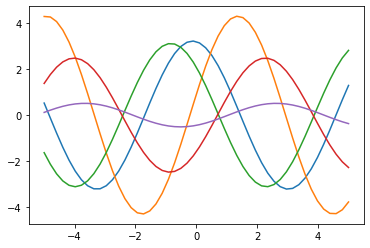

In [7]:
# plot task batch
plot_tasks(tasks)

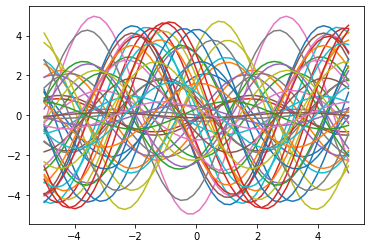

In [8]:
# plot many tasks
plot_tasks(sinus_dataset.sample_tasks(50))

In [9]:
task = tasks[4]

In [10]:
task.support_set

(tensor([[ 2.8710],
         [-2.6063],
         [ 3.7648],
         [-4.4143],
         [-1.6388],
         [-3.4972],
         [-0.4966],
         [ 2.9632],
         [-2.6936],
         [-4.4798]]),
 tensor([[ 0.4959],
         [ 0.2526],
         [ 0.2125],
         [ 0.3732],
         [-0.2231],
         [ 0.5048],
         [-0.5115],
         [ 0.4822],
         [ 0.2904],
         [ 0.3495]]))

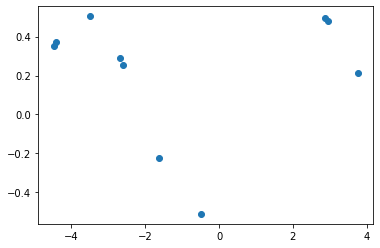

In [11]:
plt.plot(task.support_set[0].numpy(), task.support_set[1].numpy(), 'o')

In [12]:
task.query_set

(tensor([[-5.0000],
         [-4.7959],
         [-4.5918],
         [-4.3878],
         [-4.1837],
         [-3.9796],
         [-3.7755],
         [-3.5714],
         [-3.3673],
         [-3.1633],
         [-2.9592],
         [-2.7551],
         [-2.5510],
         [-2.3469],
         [-2.1429],
         [-1.9388],
         [-1.7347],
         [-1.5306],
         [-1.3265],
         [-1.1224],
         [-0.9184],
         [-0.7143],
         [-0.5102],
         [-0.3061],
         [-0.1020],
         [ 0.1020],
         [ 0.3061],
         [ 0.5102],
         [ 0.7143],
         [ 0.9184],
         [ 1.1224],
         [ 1.3265],
         [ 1.5306],
         [ 1.7347],
         [ 1.9388],
         [ 2.1429],
         [ 2.3469],
         [ 2.5510],
         [ 2.7551],
         [ 2.9592],
         [ 3.1633],
         [ 3.3673],
         [ 3.5714],
         [ 3.7755],
         [ 3.9796],
         [ 4.1837],
         [ 4.3878],
         [ 4.5918],
         [ 4.7959],
         [ 5.0000]])

([<matplotlib.lines.Line2D at 0x7f67dc72e130>], 4.30128095527909)

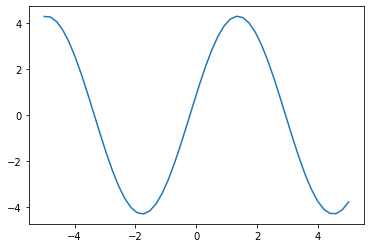

In [13]:
task = tasks[1]
plt.plot(task.query_set[0].numpy(), task.query_set[1].numpy()), task.amplitude

In [14]:
for t in tasks:
    print(t.amplitude)

3.2211122678751263
4.30128095527909
3.115387046258144
2.480593258275767
0.5116751835536857


## Use Dataloader for task loading

In [15]:
sinus_cfg = """
support_size: 10
query_size: 50
# num_tasks: 1000
amplitude_range: [0.1, 5.0]
phase_range: [0, 6.283185307]
x_range: [-5, 5]
regenerate_task_support_set: False
seed: 0
"""
sinus_cfg = OmegaConf.create(sinus_cfg)
sinus_dataset = sinus_dataset_class(**sinus_cfg)


In [16]:
dataloader = data.DataLoader(sinus_dataset, batch_size=None, num_workers=4, persistent_workers=True)
episode_iter = iter(dataloader)

In [17]:
for i in range(5):
    task = next(episode_iter)
    print(task.name)

Ampl_3.2211-Phase_1.6951
Ampl_2.6079-Phase_5.9719
Ampl_1.3819-Phase_1.8755
Ampl_0.5197-Phase_1.4879
Ampl_4.3013-Phase_0.2110


## Use Task's TensorDatasets

In [18]:
sinus_cfg = """
support_size: 64 # 10
query_size: 100 # 50
num_tasks: 1
amplitude_range: [0.1, 5.0]
phase_range: [0, 3.141592654]
x_range: [-5, 5]
regenerate_task_support_set: False
regenerate_task_query_set: False
seed: 0
"""
sinus_cfg = OmegaConf.create(sinus_cfg)
sinus_dataset = sinus_dataset_class(**sinus_cfg)

In [19]:
task = sinus_dataset.get_tasks(num_tasks=1)[0]

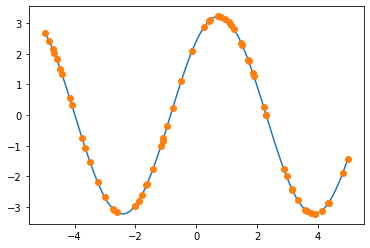

In [20]:
qs = task.query_set
ss = task.support_set
plt.plot(qs[0].numpy(), qs[1].numpy())
plt.plot(ss[0].numpy(), ss[1].numpy(), 'o')

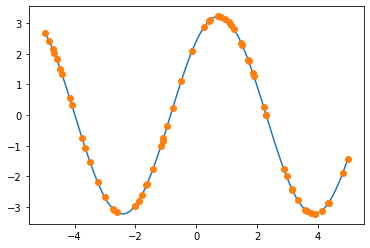

In [21]:
# check regenerate == False
qs = task.query_set
ss = task.support_set
plt.plot(qs[0].numpy(), qs[1].numpy())
plt.plot(ss[0].numpy(), ss[1].numpy(), 'o')

In [22]:
sinus_train_dataset = task.get_support_dataset()
len(sinus_train_dataset)

64

## Use SupervisedMetaDatasetWrapper

In [45]:
data_cfg = """
supervised_metadataset_wrapper_kwargs:
  task_idx: 0
  metadataset: sinus
  metadataset_kwargs:
    support_size: 64
    query_size: 50
    num_tasks: 13
    amplitude_range: [0.1, 5.0]
    phase_range: [0, 3.141592654]
    x_range: [-5, 5]
    regenerate_task_support_set: False
    regenerate_task_query_set: False
    seed: 0
"""
data_cfg = OmegaConf.create(data_cfg)

In [46]:
supervised_metadataset = SupervisedMetaDatasetWrapper(**data_cfg.supervised_metadataset_wrapper_kwargs)

In [47]:
supervised_metadataset.task_name

'Ampl_0.5093-Phase_2.0671'

In [48]:
len(supervised_metadataset.train_split), len(supervised_metadataset.val_split)

(64, 50)